# 06 - Enačbe hoda (Initial value problem)
<p style="font-weight: 600; text-align: center;">
Matematično-fizikalni praktikum, avgust 2024 <br>
Luka Skeledžija, 28201079
</p>

<style>
.MJXc-display{
    display: inline-block !important;
    width: 100%;
    margin: 0;
}
@media print {
    .pagebreak { page-break-before: always; } /* page-break-after works, as well */
}

img{
    width: 100%;
    max-width: 600px !important;
    margin: auto !important;
}

body {
    overflow: hidden;
    max-width: 600px;
    margin: auto;
}

::-webkit-scrollbar {
  width: 0px;
}

table{
    width: 100%;
}

h1 {
    text-transform: uppercase;
    text-align: center;
    background: #222222;
    color: white;
    padding: 8px;
}

blockquote {
    margin-left: 0em!important;
    margin-right: 0em!important;

}

.jp-RenderedHTMLCommon pre, .jp-RenderedHTMLCommon code {

    background-color: var(--jp-layout-color2)!important;
}

.jp-RenderedHTMLCommon pre{
    margin: 0.5em 0em!important;
    padding: 0em 1.5em!important;
}

body {
    counter-reset: h2counter;
}
h1 {
    counter-reset: h2counter;
}
h2:before {
    content: counter(h2counter) ".\0000a0\0000a0";
    counter-increment: h2counter;
    counter-reset: h3counter;
}
h3:before {
    counter-increment: h3counter;
    content: counter(h2counter) "." counter(h3counter) ".\0000a0\0000a0";
  
}




</style>


---

## Uvod

Za opis najpreprostejših fizikalnih procesov uporabljamo
navadne diferencialne enačbe, ki povezujejo vrednosti
spremenljivk sistema z njihovimi časovnimi
spremembami. Tak primer je na primer enačba za časovno
odvisnost temperature v stanovanju, ki je obdano s stenami
z neko toplotno prevodnostjo in določeno zunanjo temperaturo.
V najpreprostejšem primeru ima enačba obliko
\begin{equation}
\frac{dT}{dt} = - k \left( T-T_\mathrm{zun} \right)
\end{equation}
z analitično rešitvijo
\begin{equation*}
T(t) = T_\mathrm{zun} + \mathrm{e}^{-kt} \left( T(0) - T_\mathrm{zun} \right) \>.
\end{equation*}
Enačbam, ki opisujejo razvoj spremenljivk sistema $y$ po času ali drugi
neodvisni spremenljivki $x$, pravimo {\sl enačbe hoda\/}.  Pri tej
nalogi bomo proučili uporabnost različnih numeričnih metod
za reševanje enačbe hoda oblike $ dy/ dx = f(x, y)$.   Najbolj groba
prva inačica, tako imenovana osnovna Eulerjeva metoda,
je le prepisana aproksimacija za prvi odvod
$y' \approx (y(x+h) - y(x)) / h$, torej

\begin{equation}
y(x+h) = y(x) + h\,\left.\frac{dy}{dx}\right|_x \>.
\end{equation}

Diferencialno enačbo smo prepisali
v diferenčno: sistem
spremljamo v ekvidistantnih korakih dolžine $h$. Metoda je
večinoma stabilna, le groba: za večjo natančnost moramo
ustrezno zmanjšati korak.   Za red boljša (${\cal O}\,(h^3 )$ , t.j. lokalna natančnost drugega reda)
je simetrizirana Eulerjeva (ali sredinska) formula, ki sledi
iz simetriziranega približka za prvi odvod,
$y' \approx (y(x+h) - y(x-h)) / 2h$.  Računamo po shemi

\begin{equation}
y(x+h) = y(x-h) + 2h\,\left.\frac{dy}{dx}\right|_x \>,

\end{equation}

ki pa je praviloma nestabilna.  Želeli bi si
pravzaprav nekaj takega

\begin{equation}
y(x+h) = y(x) + {h\over 2}\,\left[\left.\frac{dy}{dx}\right|_x
+ \left.\frac{dy}{dx}\right|_{x+h} \right] \>,
\end{equation}

le da to pot ne poznamo odvoda v končni točki intervala
(shema je implicitna). Pomagamo si lahko z iteracijo.
Zapišimo odvod kot:

\begin{equation}
\left.{dy \over dx}\right|_x = f(x,y)
\end{equation}

ter

\begin{equation}
x_{n+1} = x_n + h,
~~~ y_n = y(x_n)
\end{equation}

Heunova metoda (${\cal O}\,(h^3 )$ lokalno) je pribli\v zek idealne formule z:

$$
\hat{y}_{n+1} =  y_n +  h \cdot f(x_n,y_n) \\
$$

$$
y_{n+1} = y_n + \frac{h}{2} \left[ f(x_n,y_n) + f(x_{n+1},\hat{y}_{n+1})\right]
$$

Izvedenka tega je nato Midpoint metoda  (tudi ${\cal O}\,(h^3 )$ lokalno):

$$
k_1 = f(x_n,y_n) \\
$$

$$
k_2 = f(x_n+{1 \over 2}h,y_n+{1 \over 2}\, h\,k_1) \\
$$

$$
y_{n+1} = y_n + h\,k_2
$$

Le-to lahko potem izbolj\v samo kot modificirano Midpoint metodo
itd

V praksi zahtevamo natančnost in numerično učinkovitost,
ki sta neprimerno boljši kot pri opisanih preprostih metodah.
Uporabimo metode, zasnovane na algoritmih prediktor-korektor,
metode višjih redov iz družine Runge-Kutta (z adaptivnimi koraki), ali ekstrapolacijske metode.
Brez dvoma ena najbolj priljubljenih je metoda RK4,

$$ 
k_1 = f\left(x,\,{y}(x)\right) \> {,}\nonumber\\
$$

$$ 
k_2 =
  f\left(x+{\textstyle{1\over 2}}h,\,
       {y}(x)+{\textstyle{h\over 2}}k_1\right) \> {,}\nonumber\\
$$

$$ 
k_3 =
  f\left(x+{\textstyle{1\over 2}}h,\,
       {y}(x)+{\textstyle{h\over 2}}k_2\right) \> {,}\\
$$

$$ 
k_4 =  f\left(x+h,\,{y}(x)+hk_3\right) \> {,}\nonumber\\
$$

$$
{y}(x+h) =  {y}(x) + {\tfrac{h}{6}}\,\left(k_1 + 2k_2 + 2k_3 + k_4\right) + {\cal O}(h^5)
  \nonumber\> {.}
$$


## Naloga

1. Preizkusi preprosto Eulerjevo metodo ter nato še čim več 
naprednejših metod( Midpoint, Runge-Kutto 4. reda, Adams-Bashfort-Moultonov prediktor-korektor) na primeru
z začetnima temperaturama $y(0)=21$ ali $y(0)=-15$,
zunanjo temperaturo $y_\mathrm{zun}=-5$ in parametrom $k=0.1$.
Kako velik (ali majhen) korak $h$ je potreben?
Izberi metodo (in korak) za izračun družine rešitev
pri različnih vrednostih parametra $k$.
2. Dodatno: temperatura prostora se lahko še
dodatno spreminja zaradi denimo sončevega segrevanja
skozi okna, s $24$-urno periodo in nekim faznim zamikom $\delta$,
kar opišemo z dva- ali triparametrično enačbo $\frac{dT}{dt} = - k \left( T-T_\mathrm{zun} \right) + A\sin\left( {2\pi\over 24}(t-\delta) \right) \>$. Poišči še družino rešitev te enačbe pri
$k=0.1$ in $\delta=10$!  Začni z $A=1$, kasneje spreminjaj tudi
to vrednost.  V premislek: kakšno metodo bi uporabil, če bi posebej
natančno želel določiti maksimalne temperature in trenutke,
ko nastopijo?


In [177]:
# Standardized imports for MFPR
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display
import markdown
import datetime
import scipy.special as sp
import scipy.stats as stats
import scipy.optimize as opt
import scipy.interpolate as interp
from matplotlib import animation
import logging
import timeit
# Function and constants defitition for Juptyer notebook (rerun for hot reload of imports)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams["grid.linestyle"]="dashed"
plt.rcParams["figure.edgecolor"] = "black"
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

def log_msg(msg, log_filename='my_log_file.log'):
    # Configure the logging module if not already configured
    if not logging.root.handlers:
        logging.basicConfig(
            filename=log_filename,
            level=logging.DEBUG,
            format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )

    # Create a logger for the function (you can replace 'my_function' with your desired logger name)
    logger = logging.getLogger('EIGENSTATES')

    # Log the provided message
    logger.info(msg)
def clear_log_file(log_filename='my_log_file.log'):
    with open(log_filename, 'w'):
        pass

def centerHTML(html, text=""):
    text = markdown.markdown(text)
    return '<div style="display: flex; align-items: center; flex-direction: column;">' + html + f'</div><div style="display: flex; align-items: center; flex-direction: column;padding-top: 15px;"><small style="max-width: 600px">{text}</small></div>'

def insertHTMLVideo(filename, text=""):
    return centerHTML(f'<video controls src="{filename}" style="max-width: 600px;width:100%"></video>', text)

def insertHTMLAudio(filename, text=""):
    return centerHTML(f'<audio controls src="{filename}" style="max-width: 600px;width:100%"></audio>', text)


clear_log_file()
log_msg('START logging...')


## Eulerjeva metoda

V nadaljevanju bomo primerjali numerično dobljeno rešitev diferencialne enačbe iz uvoda (izračunano po Eulerjevi metodi) z analitično rešitvijo. Opazimo, da morajo biti velikosti koraka relativno majhne (< 1), da se numerične rešitve "na oko" ustrezno prilegajo analitični. Višje vrednosti koraka okoli analitične rešitve skačejo. Če pa korak še povečujemo pa začne metoda divergirati, kar lahko opazimo kot naraščanje krivulje absolutne razlike numerične in analitične rešitve v odvisnosti od časa $t$.

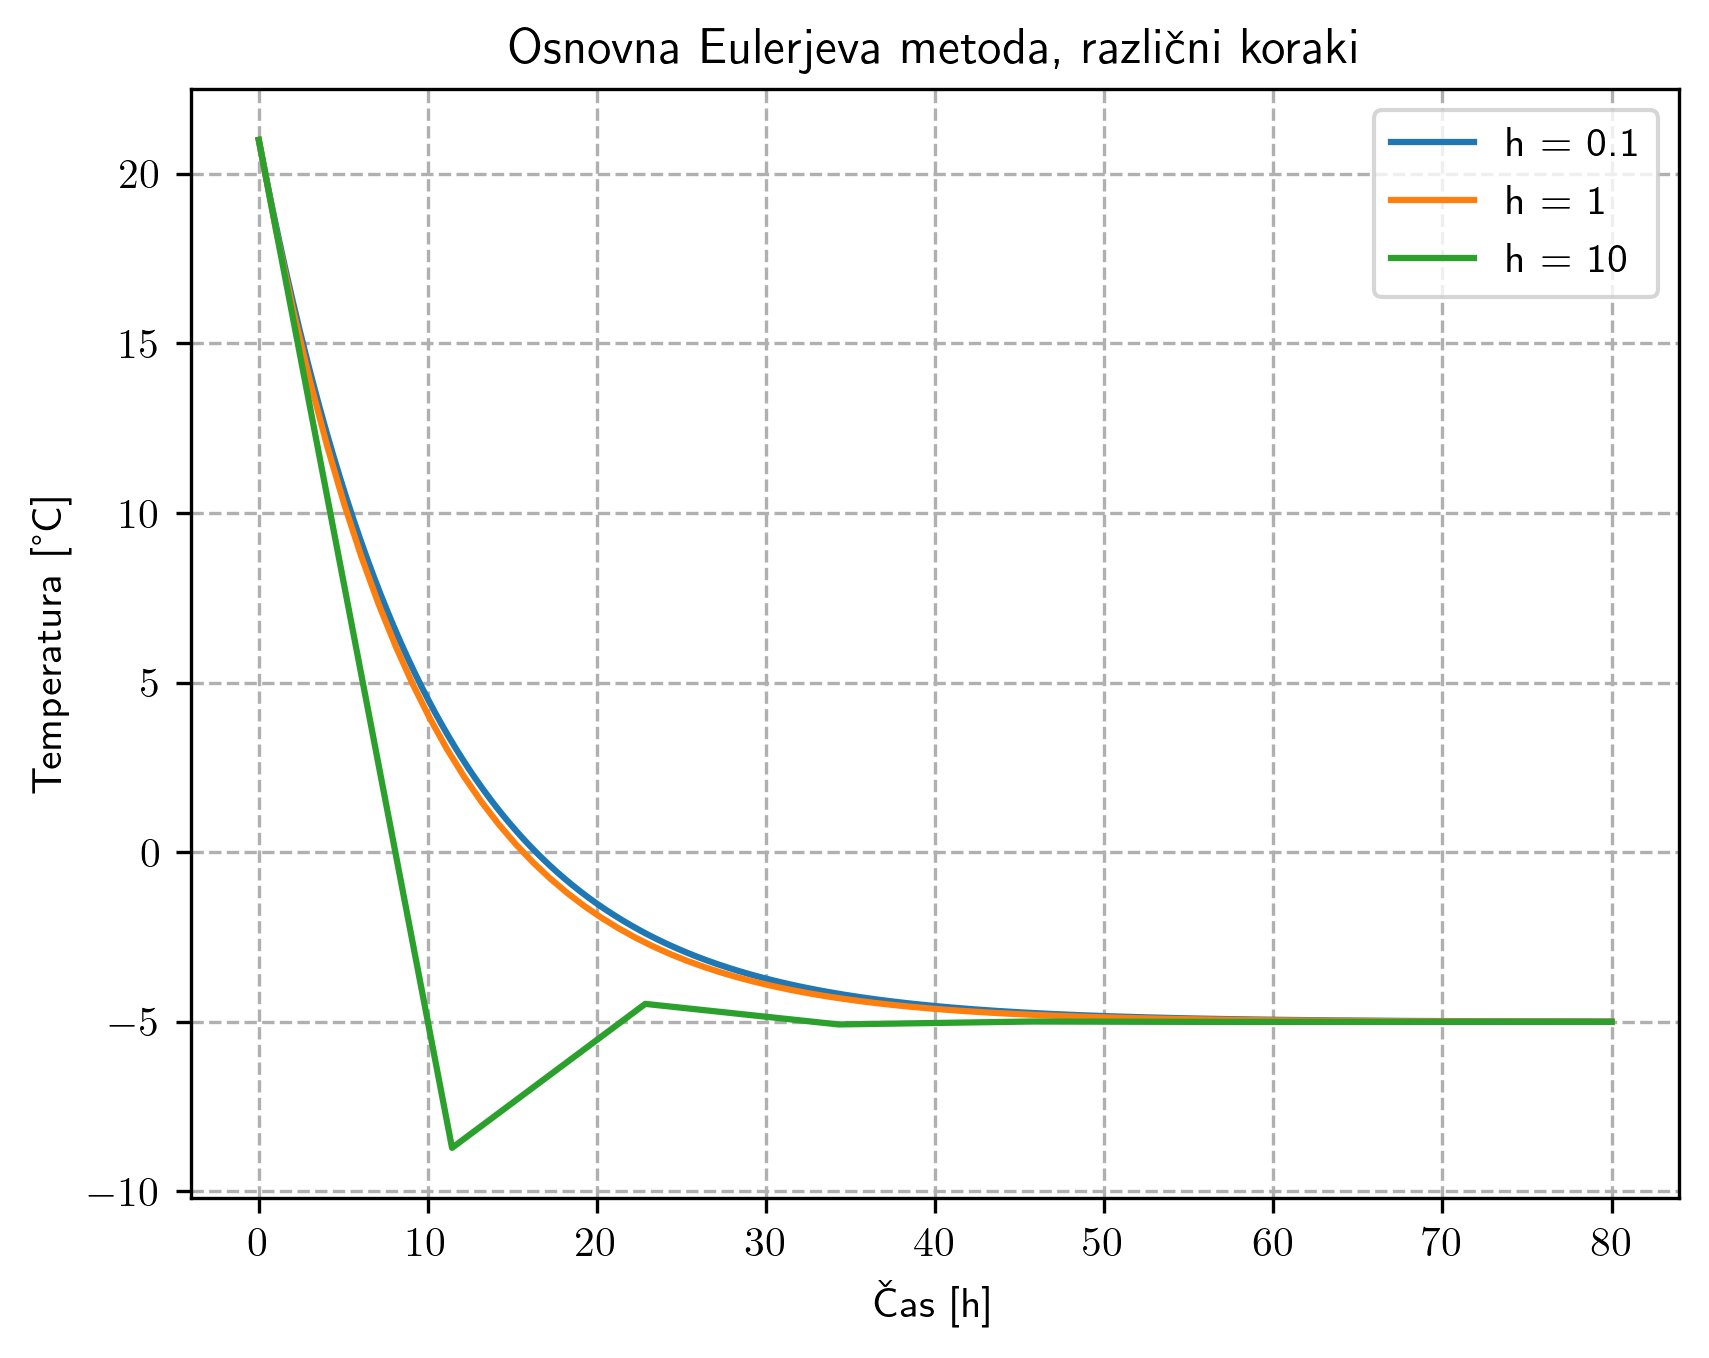

In [178]:
def prevajanje(y, t, k=np.float64(0.1), T_zun=np.float64(-5)):
    return - k * (y - T_zun)

def analityc(t, k=0.1, T_0=21, T_zun=-5):
    return T_zun + (T_0 - T_zun) * np.exp(-k * t) 

def eulers_method(f, t_s, f_0):
    # Eulers method
    y_s = np.full_like(t_s, f_0)
    h = t_s[1] - t_s[0]
    for i in range(0, len(t_s)-1):
        y_s[i+1] = y_s[i] + h * f(y_s[i], t_s[i])
    return y_s

# Constants
k = np.float64(0.1)
T_0 = np.float64(21)
T_zun = np.float64(-5)

plt.title('Osnovna Eulerjeva metoda, različni koraki')
plt.xlabel('Čas [h]')
plt.ylabel('Temperatura [°C]')

for korak in [0.1, 1, 10]:
    t = np.linspace(0, 80, int(80/korak))
    y = eulers_method(prevajanje, t, T_0)
    plt.plot(t, y, label=f'h = {korak}')

plt.grid()
plt.legend()
plt.show()    

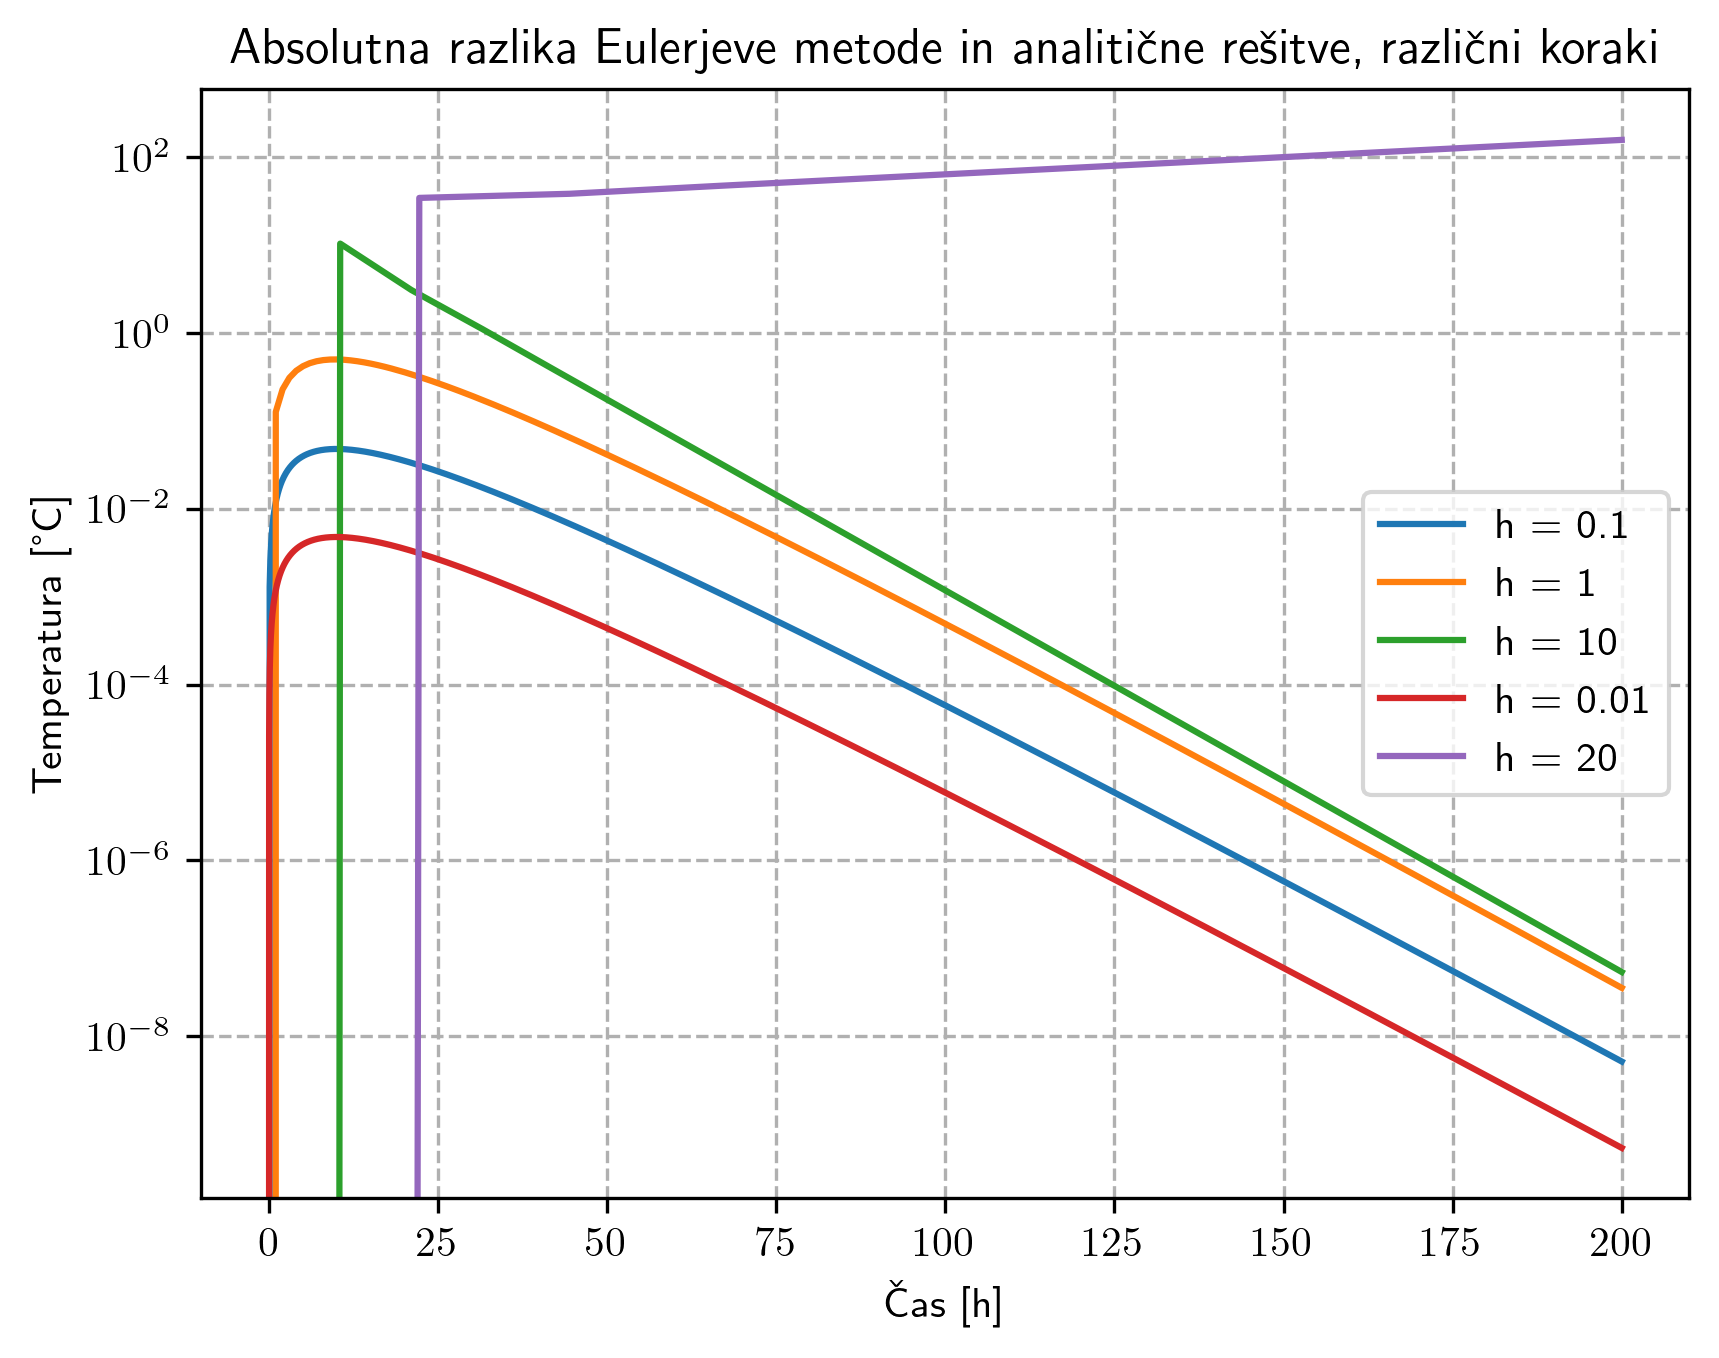

In [179]:
plt.title('Absolutna razlika Eulerjeve metode in analitične rešitve, različni koraki')
plt.xlabel('Čas [h]')
plt.ylabel('Temperatura [°C]')
plt.yscale('log')

for korak in [0.1, 1, 10, 0.01, 20]:
    t = np.linspace(0, 200, int(200/korak))
    y = eulers_method(prevajanje, t, T_0)
    y_anal = analityc(t)
    plt.plot(t, np.abs(y_anal - y), label=f'h = {korak}')

plt.grid()
plt.legend()
plt.show() 

## Ostale metode

Ker je Eulerjeva metoda razmeroma preprosta, lahko poizkusimo še nekatere nadgradnje. V primerjavo bomo vzeli metode po Eulerju, Midpoint metodo, Adams-Bashforth preditkor/korektor in metodo Runge-Kutta 4. reda. Primerjamo oddaljenost od analitične rešitve v povezavi z velikostjo koraka. Ugotovimo, da nam za enako velikost koraka metodi Runge-Kutta-4 in Preditkor-Korektor-4 ponujata kar nekaj redov večjo natančnost. Če v obzir vzamemo še časovno zahtevnost, ugotovimo, da z naprednejšimi metodami za (relativno) majhno podaljšanje časa dobimo veliko večjo natančnost. Kar v valuti računalniških zmogljivosti pomeni, da so precej bolj ekonomične.

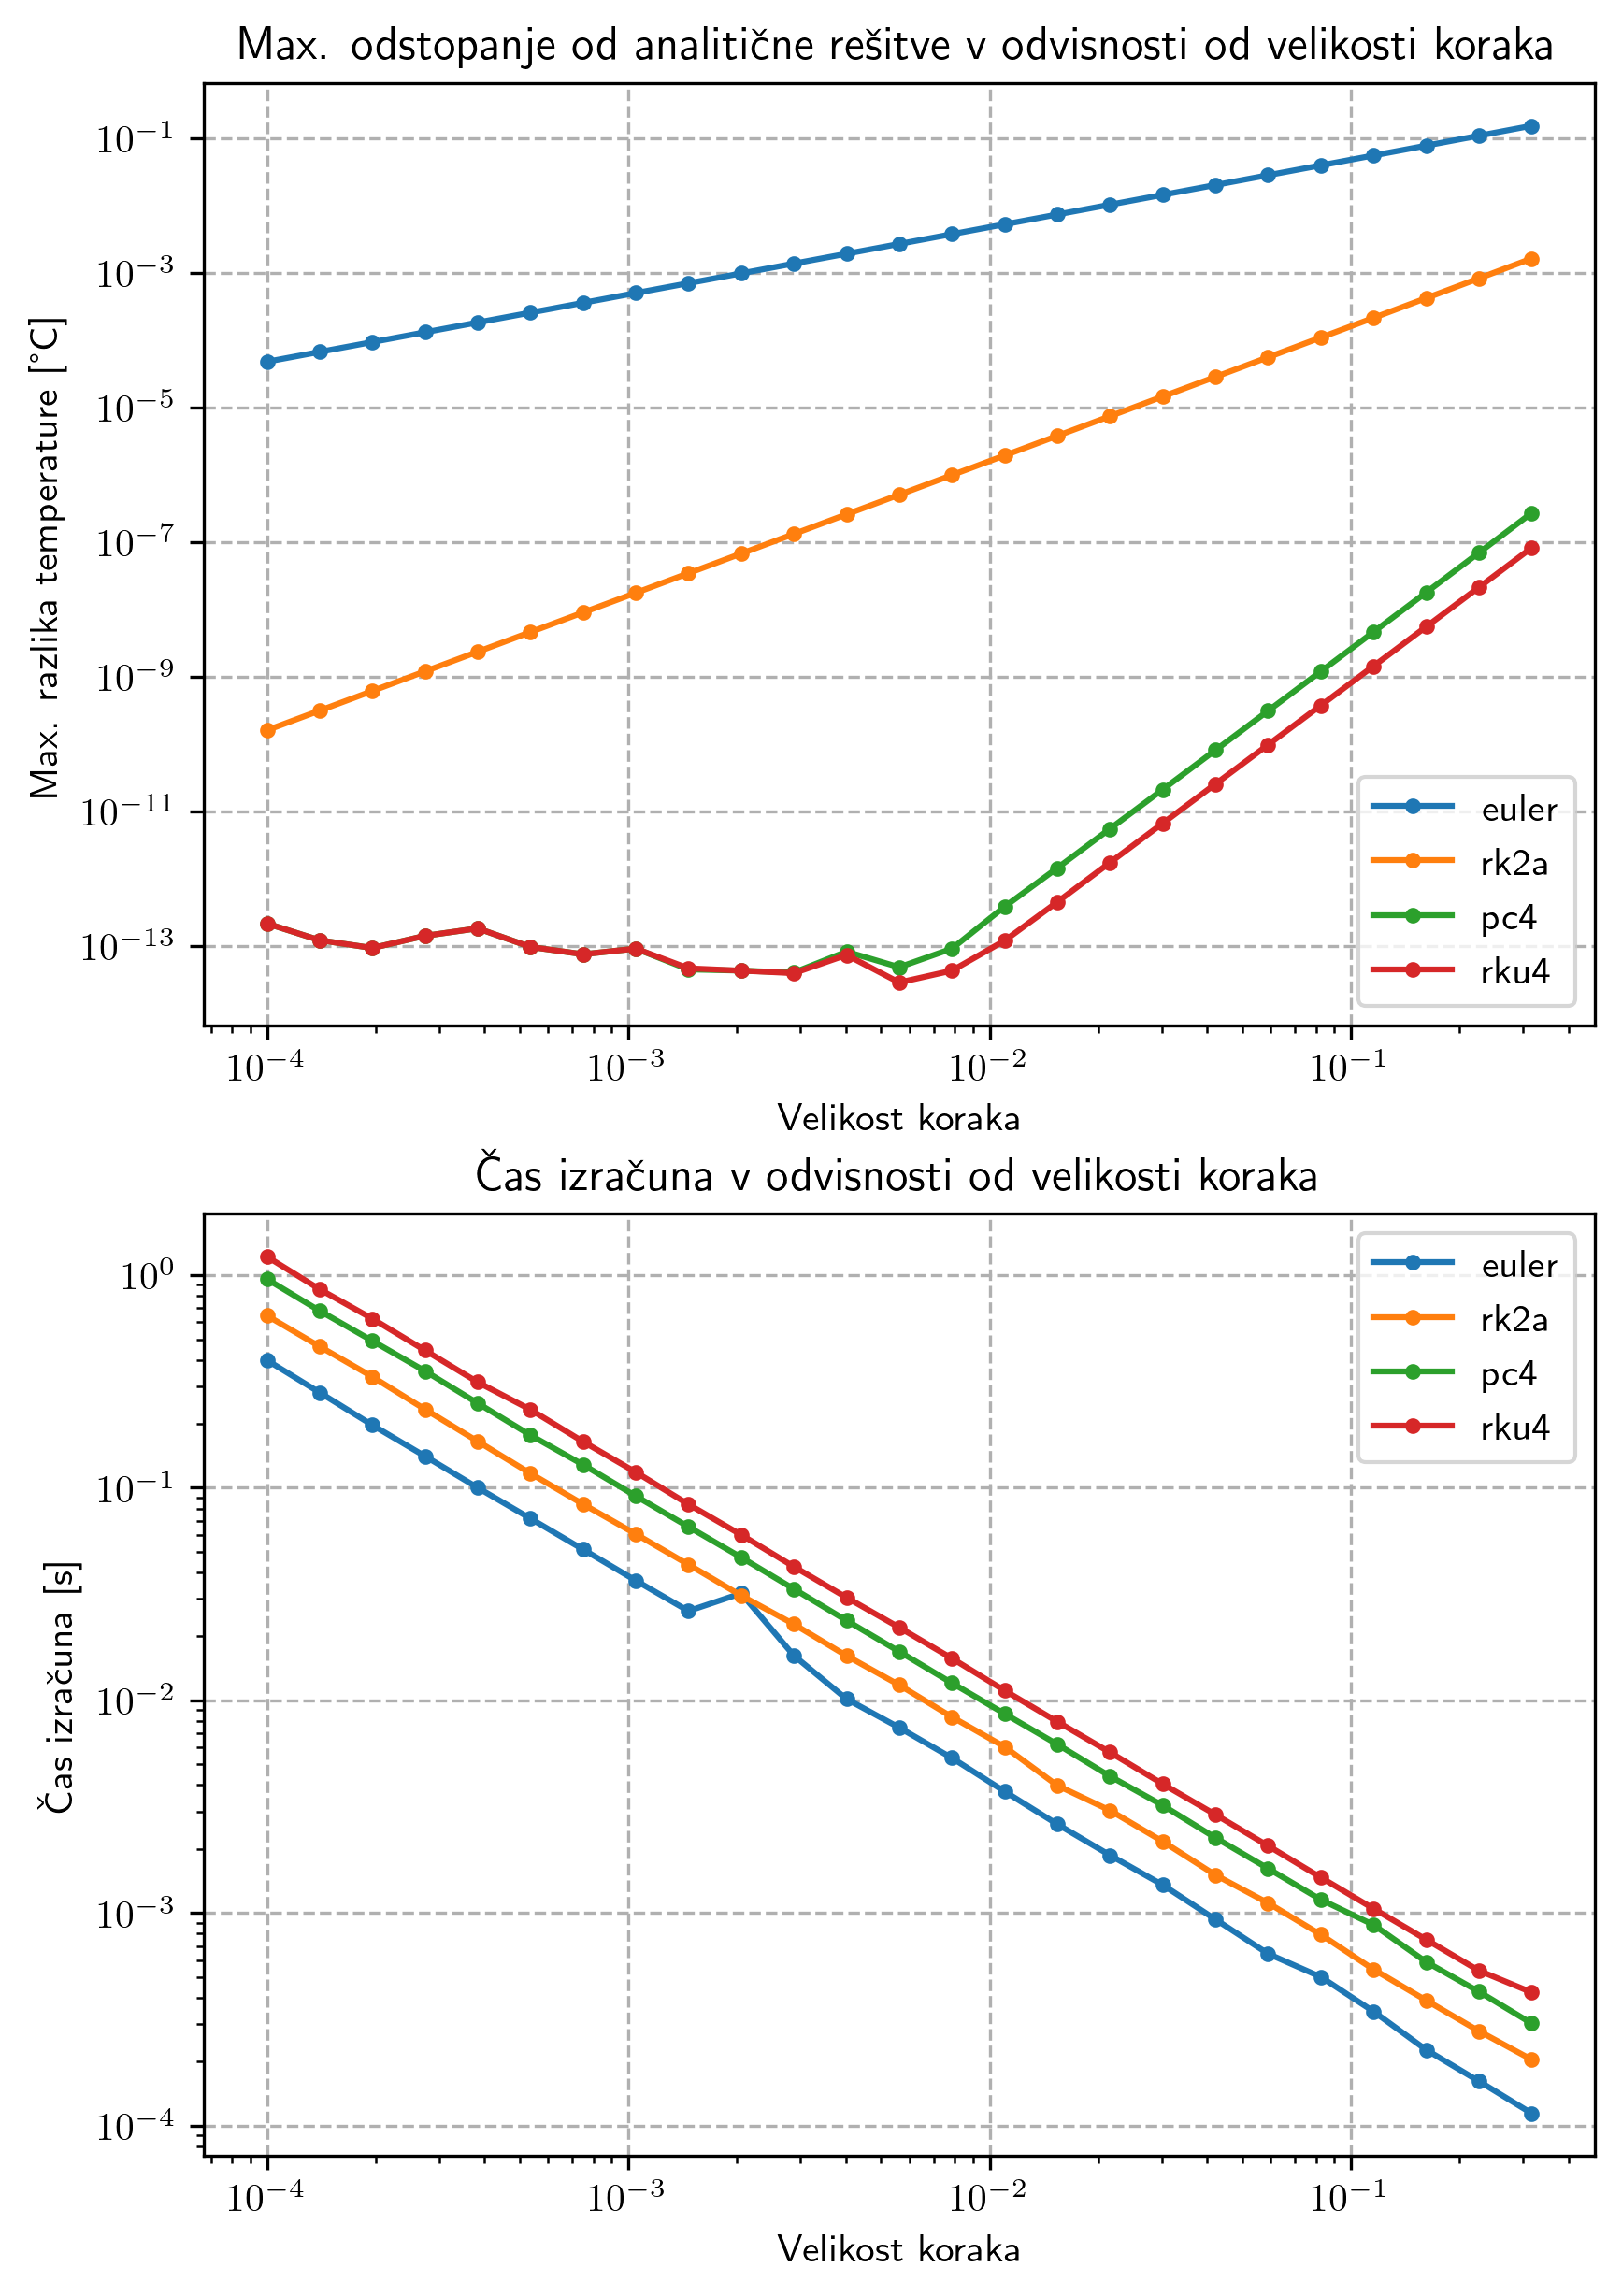

In [180]:
from diffeq_tsint import euler, rk2a, pc4, rku4

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.4, 9.6))

for metoda in [euler, rk2a, pc4, rku4]:
    ax1.set_title('Max. odstopanje od analitične rešitve v odvisnosti od velikosti koraka')
    ax1.set_xlabel('Velikost koraka')
    ax1.set_ylabel('Max. razlika temperature [°C]')
    ax1.set_yscale('log')
    ax1.set_xscale('log')

    ax2.set_title('Čas izračuna v odvisnosti od velikosti koraka')
    ax2.set_xlabel('Velikost koraka')
    ax2.set_ylabel('Čas izračuna [s]')
    ax2.set_yscale('log')
    ax2.set_xscale('log')

    step_size = np.logspace(-4, -0.5, 25)
    #step_size = np.linspace(0.001, 0.1, 5)
    max_error = np.zeros_like(step_size)
    calc_time = np.zeros_like(step_size)
    for i, step in enumerate(step_size):
        start_time = timeit.default_timer()
        #print(f'{metoda.__name__} - {step}')
        t = np.arange(0, 100, step)
        y = metoda(prevajanje, T_0, t)
        calc_time[i] = timeit.default_timer() - start_time
        y_anal = analityc(t)
        diff = np.abs(y_anal - y)
        max_error[i] = np.max(diff)

    ax1.plot(step_size, max_error, marker='.', label=f'{metoda.__name__}')
    ax2.plot(step_size, calc_time, marker='.', label=f'{metoda.__name__}')

ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()
plt.show()

## Družina rešitev

Na podlagi ugotovitev in primerjave iz prejšnjega poglavja lahko zdaj sestavimo optimalen set parametrov za izračun družine funkcij pri spremenljivi vrednosti $k$. Kot integracijsko metodo izberemo metodo `Runge-Kutta 4`, saj nam ta v zameno za ~1 red počasnejšega računanja ponuja skoraj 10 redov dodatne natančnosti. Pri čemer ostaja tudi velikost koraka povsem zmerna $\approx 10^{-2}$.

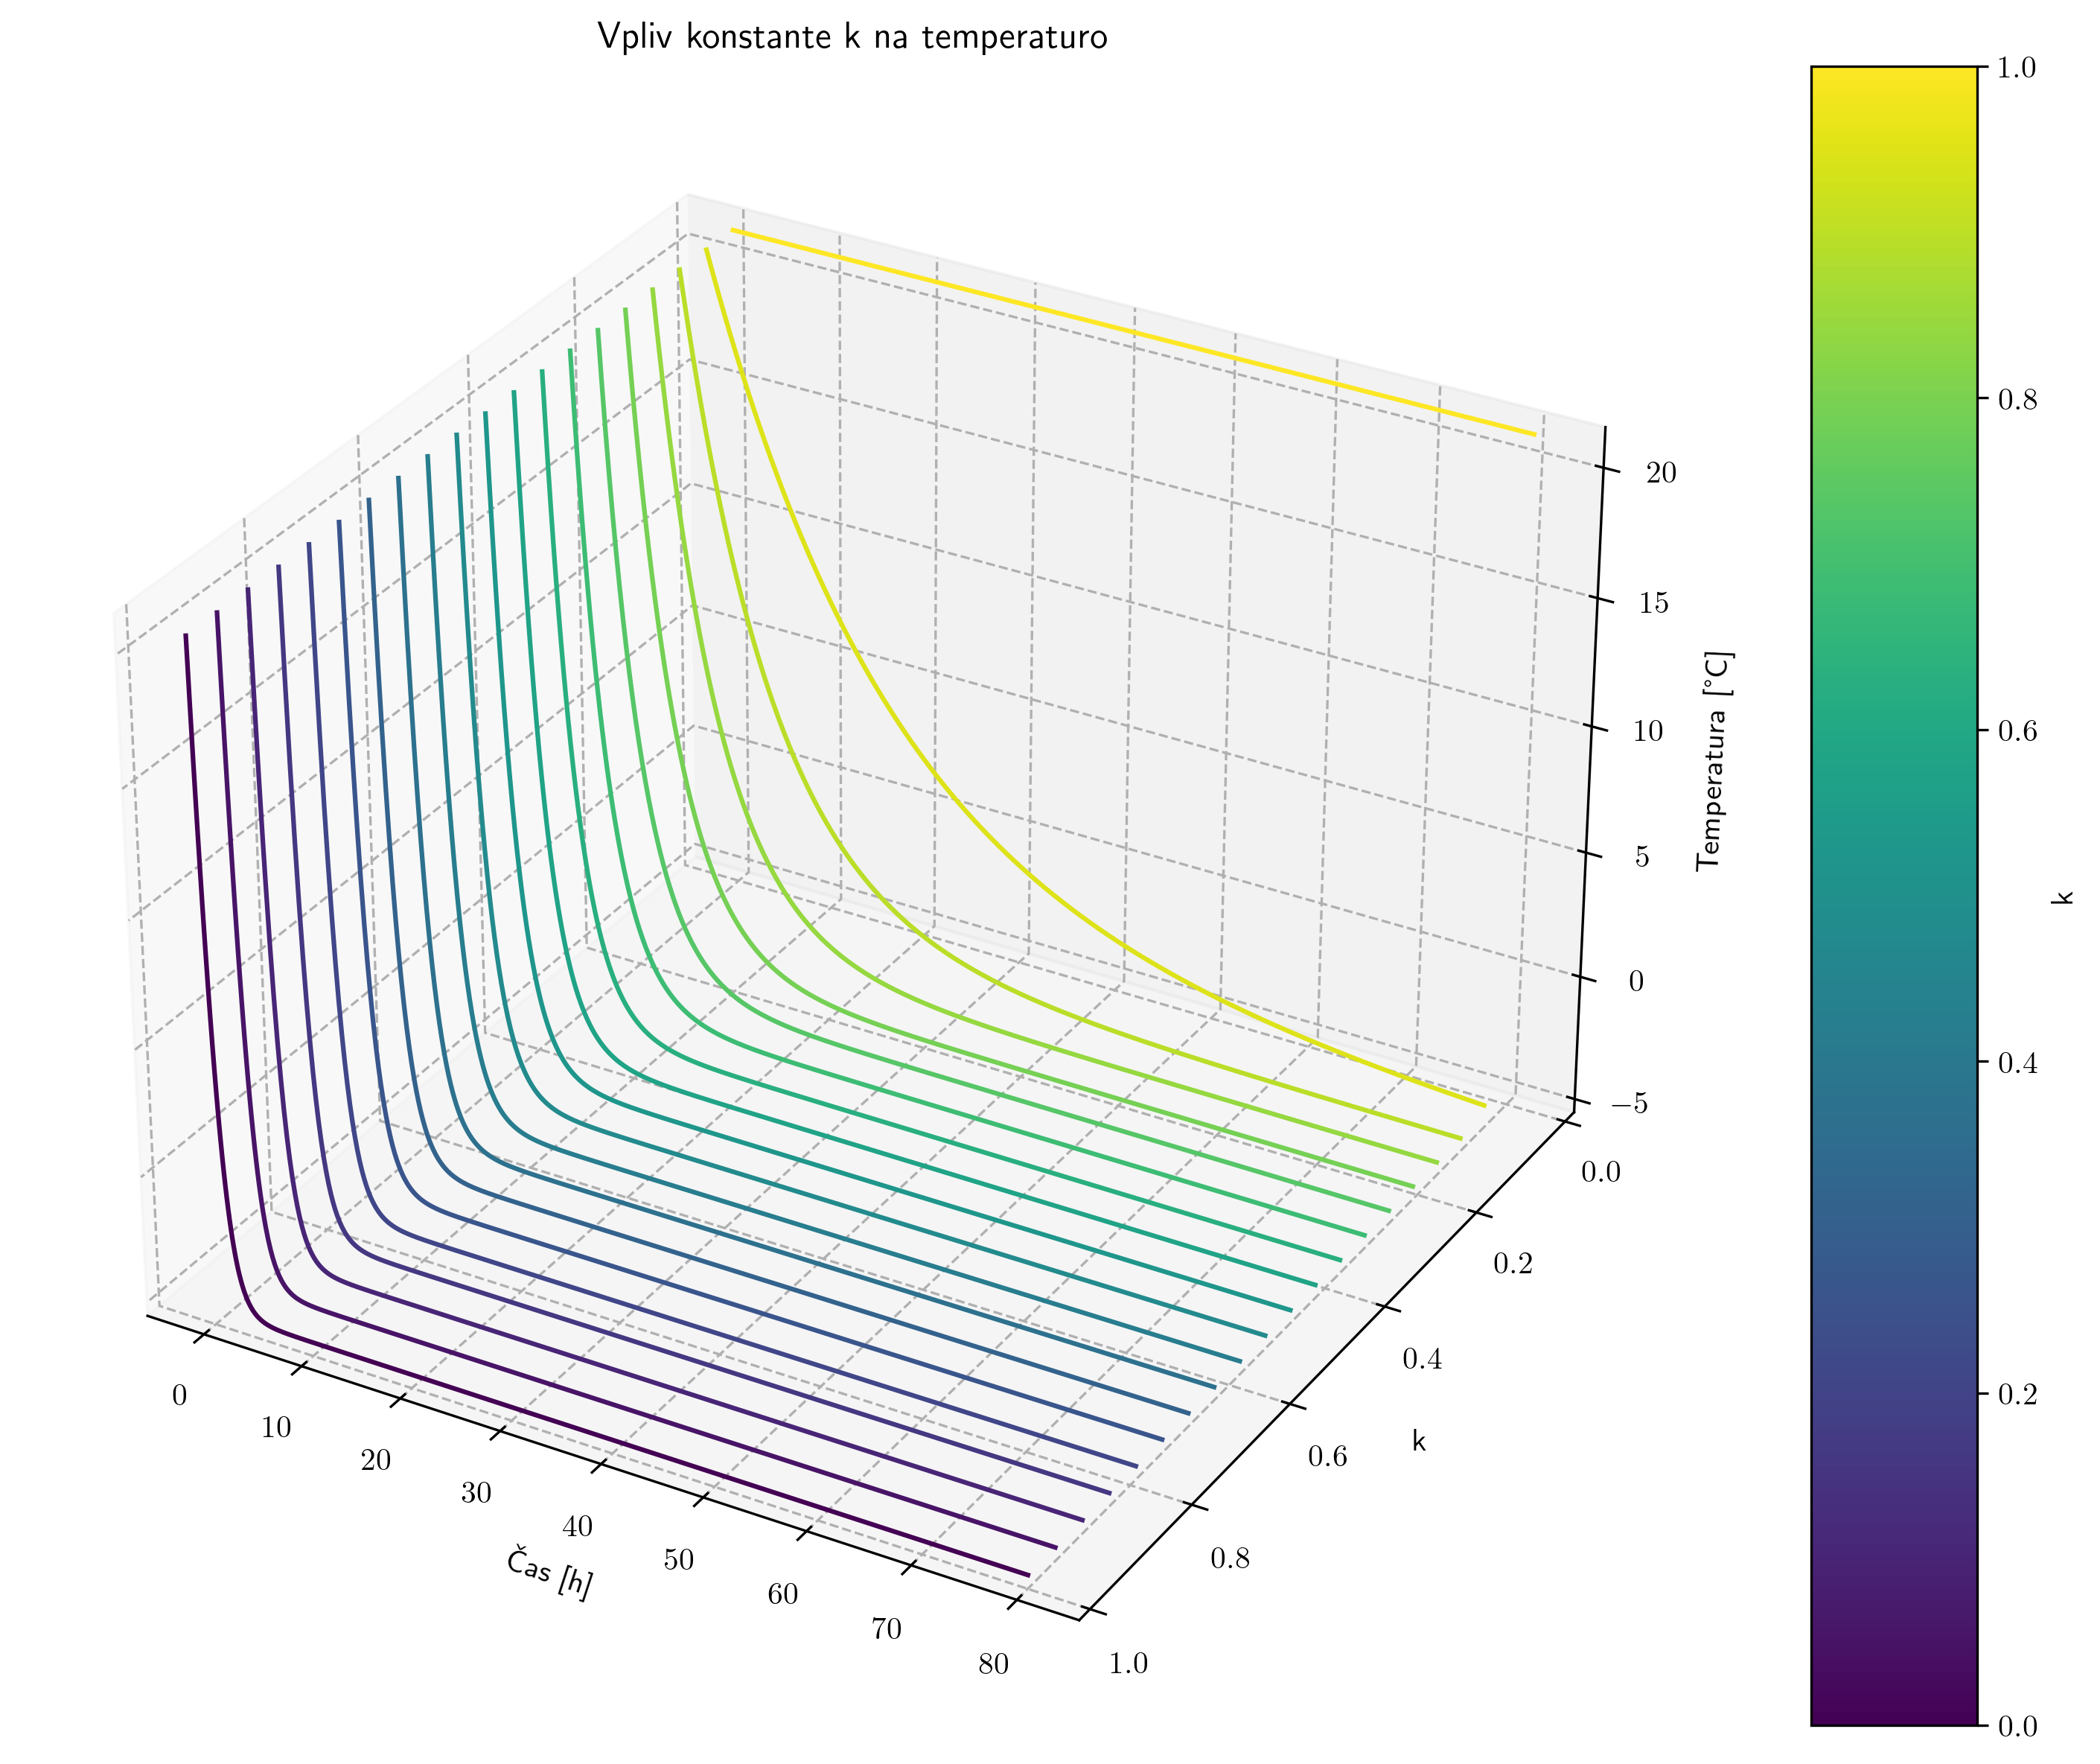

In [181]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

t = np.linspace(0, 80, 800)
druzina = np.linspace(1, 0, 20)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = cm.viridis(np.linspace(0, 1, len(druzina)))

for i, k in enumerate(druzina):
    f_druzine = lambda y, t: prevajanje(y, t, k=k)
    y = rku4(f_druzine, T_0, t)
    ax.plot(t, y, zs=k, zdir='y', color=colors[i])

ax.set_xlabel('Čas [h]')
ax.set_ylabel('k')
ax.set_zlabel('Temperatura [°C]')
ax.set_title('Vpliv konstante k na temperaturo')
ax.yaxis_inverted()

sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='k', aspect=10)
ax.set_ylim(1, 0)

plt.tight_layout()
plt.show()

## Dodatek

V dodatku analiziramo še družine krivulj za spreminjajoče se parametra $k$, $A$ in $\delta$ pri modelu prevajanja s periodičnim ogrevanjem (npr. Sonce). Opazimo, da se rešitve bolj zakomplicirajo. Če nas zanima nas zanimajo ekstremi rešitev, bi bilo verjetno bolje uporabiti katero izmed metod numerične integracije, ki prilagaja vrednost koraka. V bližini točk, ki nas zanimajo (oz. kjer se krivulja bolj prelomi), je tedaj več točk in ima določitev x koordinate manjšo negotovost. 

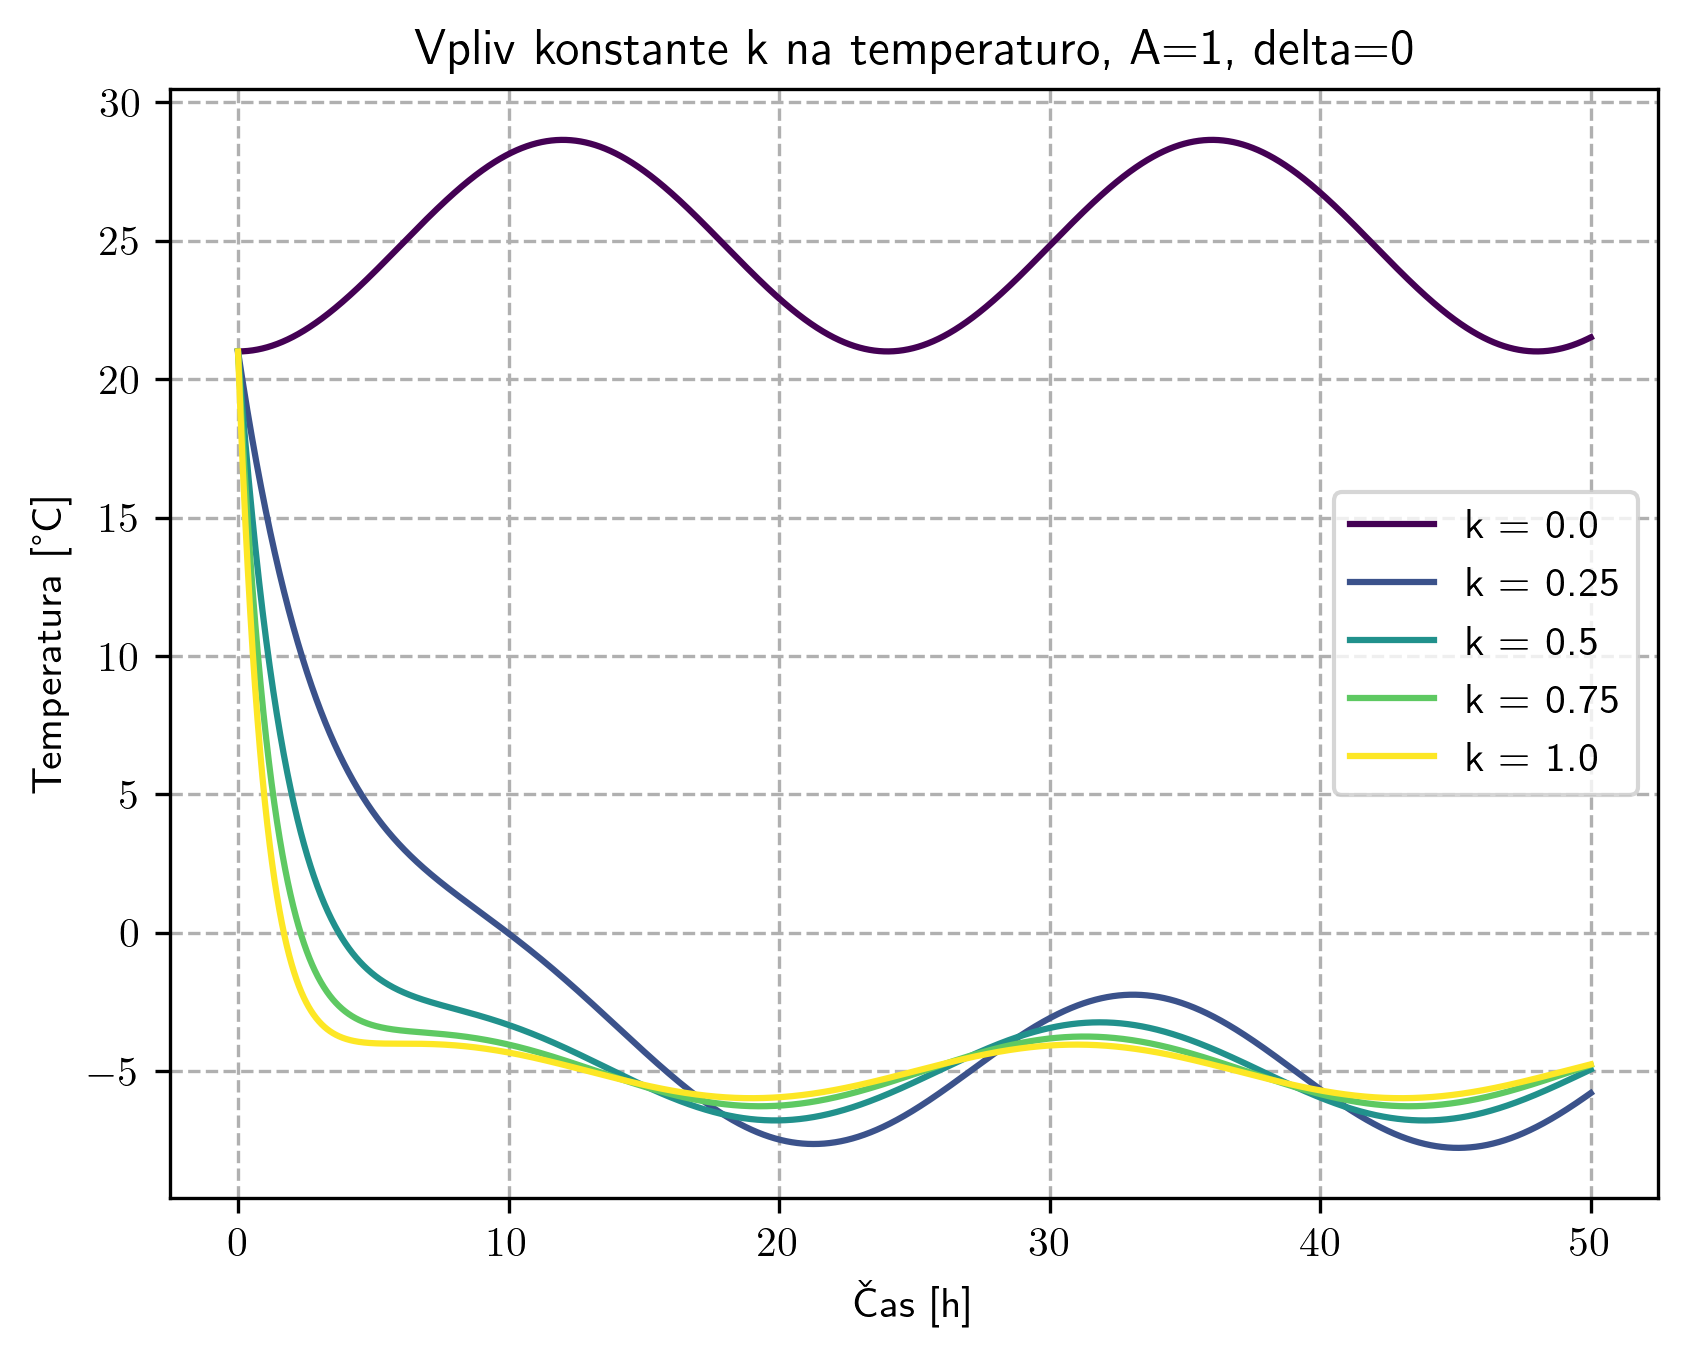

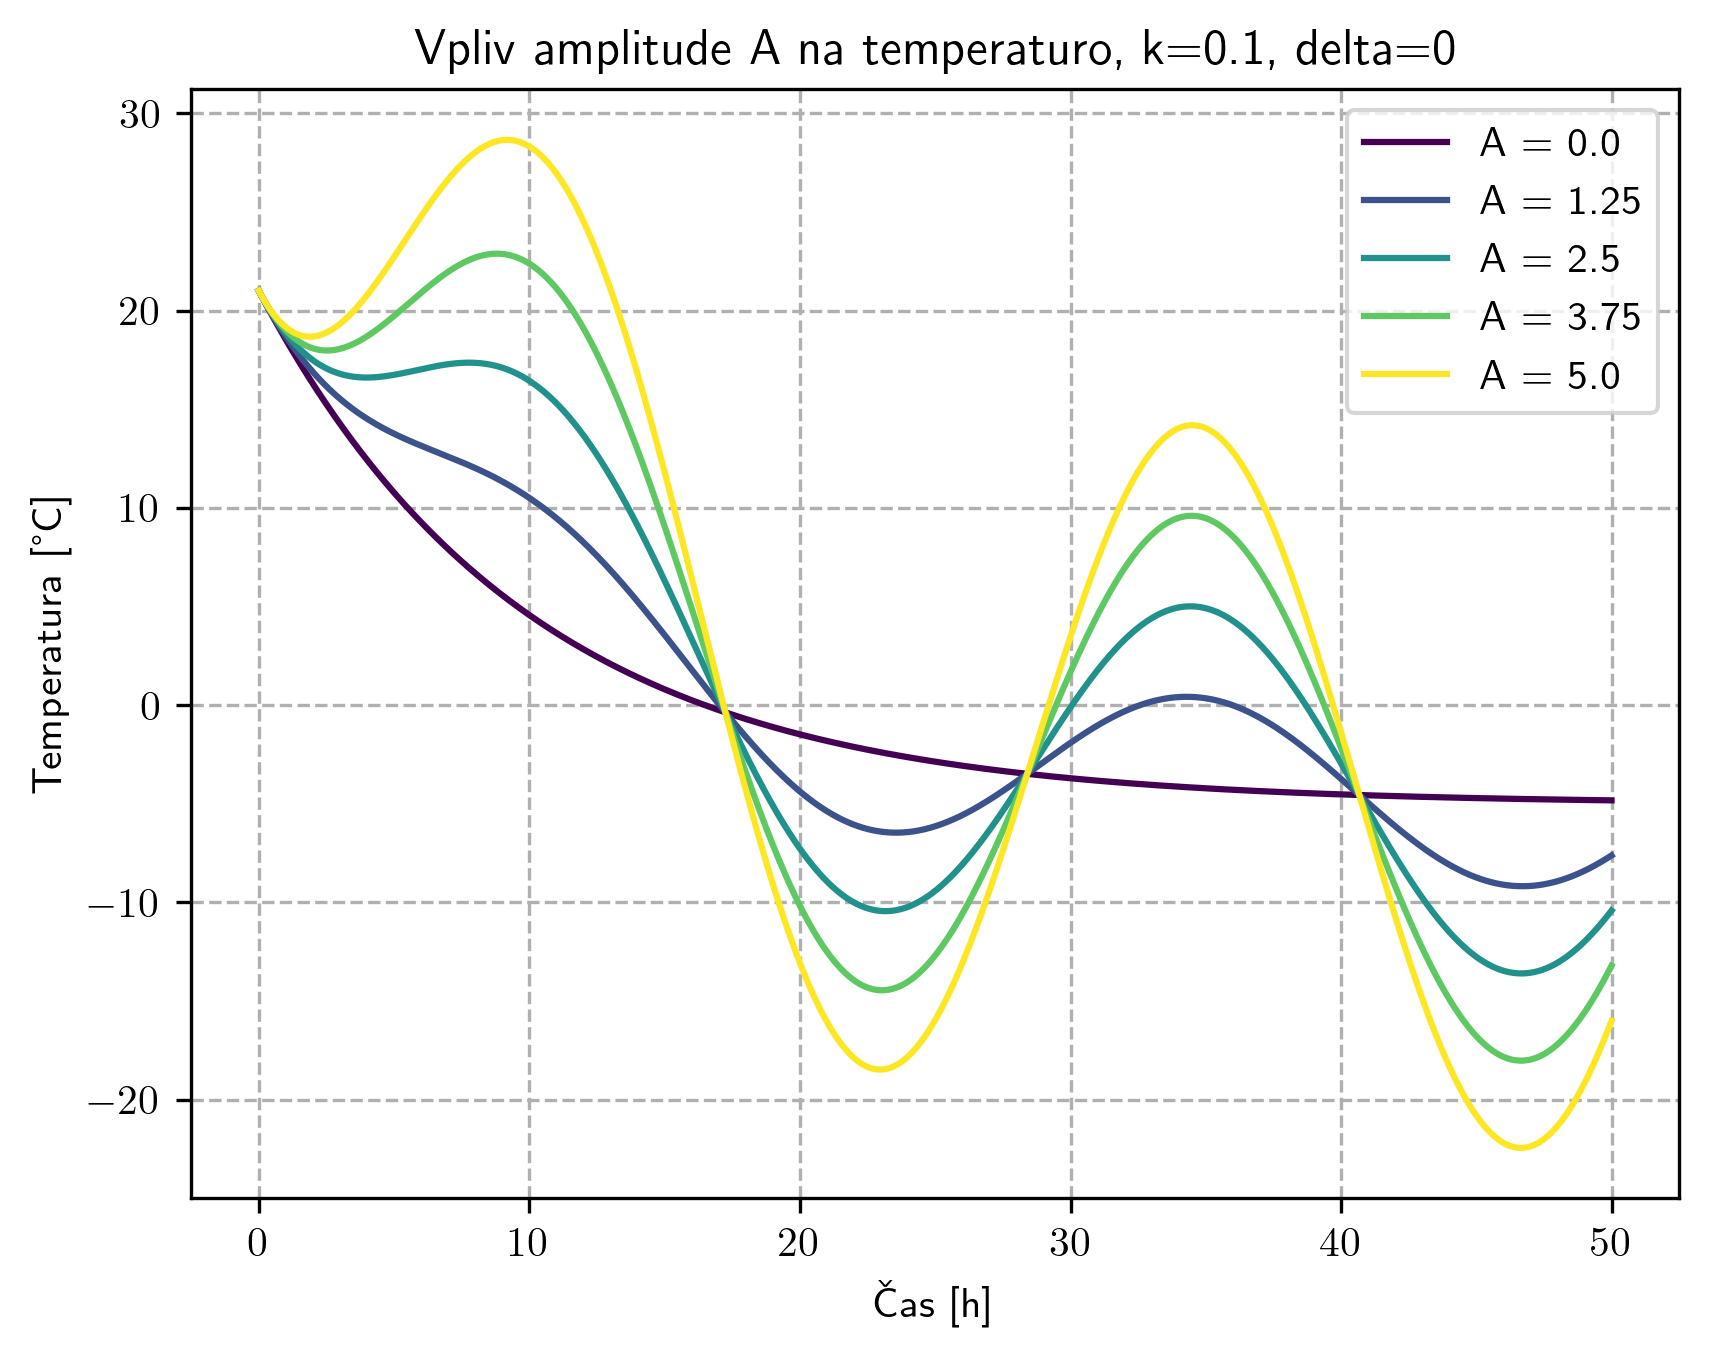

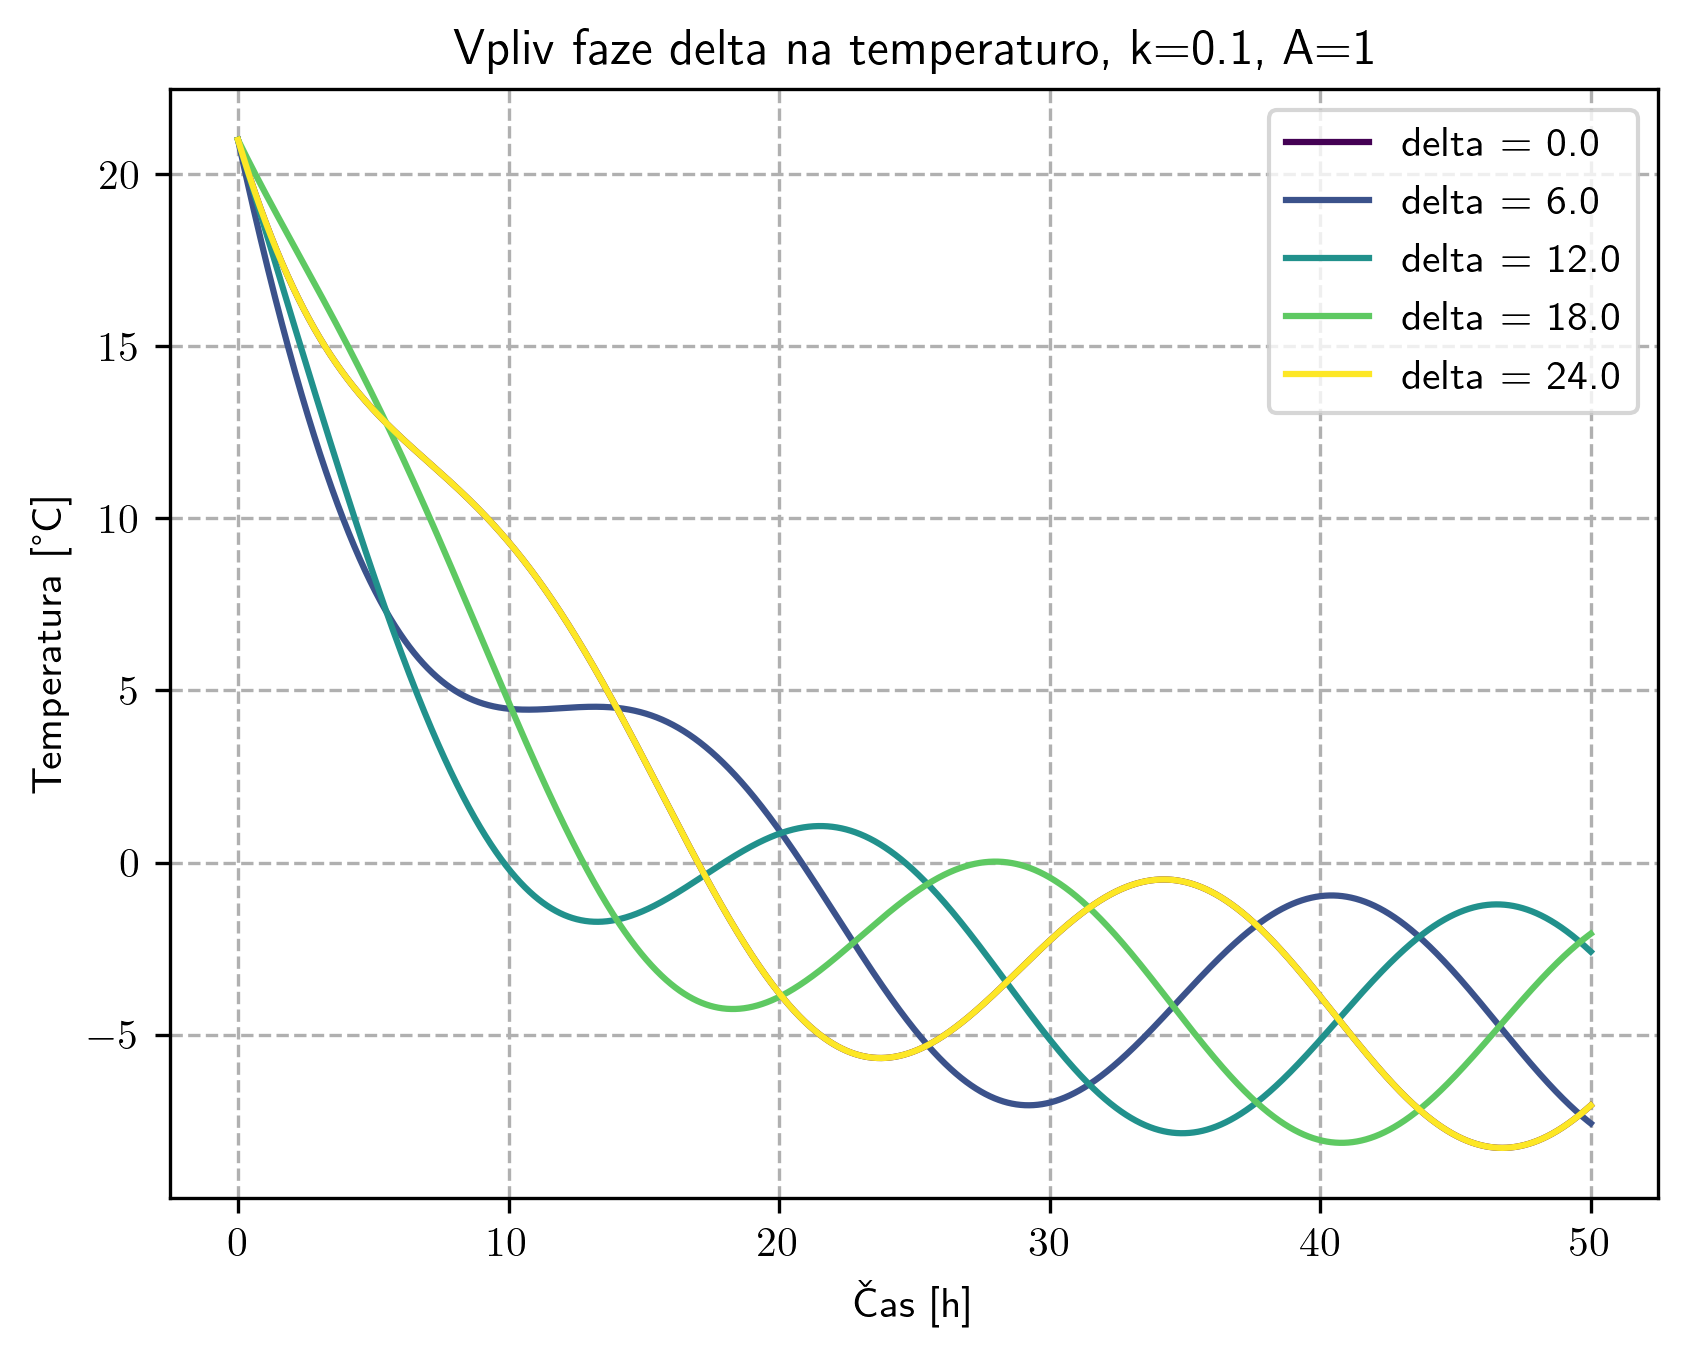

In [183]:
def prevajanje2(y, t, A=1, delta=0,  k=np.float64(0.1), T_zun=np.float64(-5)):
    return - k * (y - T_zun) + A*np.sin(2*np.pi/24*(t-delta))

druzina_k = np.linspace(0, 1, 5)
druzina_A = np.linspace(0, 5, 5)
druzina_delta = np.linspace(0, 24, 5)

cmap = plt.colormaps.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(druzina_k)))

for i, k in enumerate(druzina_k):
    t = np.arange(0, 50, 0.01)
    f_druzine = lambda y, t: prevajanje2(y, t, k=k)
    y = rku4(f_druzine, T_0, t)
    plt.plot(t, y, c=colors[i], label=f'k = {k}')

plt.title('Vpliv konstante k na temperaturo, A=1, delta=0') 
plt.xlabel('Čas [h]')
plt.ylabel('Temperatura [°C]')
plt.grid()
plt.legend()
plt.show()

for i, A in enumerate(druzina_A):
    t = np.arange(0, 50, 0.01)
    f_druzine = lambda y, t: prevajanje2(y, t, A=A)
    y = rku4(f_druzine, T_0, t)
    plt.plot(t, y, c=colors[i], label=f'A = {A}')

plt.title('Vpliv amplitude A na temperaturo, k=0.1, delta=0')
plt.xlabel('Čas [h]')
plt.ylabel('Temperatura [°C]')
plt.grid()
plt.legend()
plt.show()

for i, delta in enumerate(druzina_delta):
    t = np.arange(0, 50, 0.01)
    f_druzine = lambda y, t: prevajanje2(y, t, delta=delta)
    y = rku4(f_druzine, T_0, t)
    plt.plot(t, y, c=colors[i], label=f'delta = {delta}')

plt.title('Vpliv faze delta na temperaturo, k=0.1, A=1')
plt.xlabel('Čas [h]')
plt.ylabel('Temperatura [°C]')
plt.grid()
plt.legend()
plt.show()


## Zaključek

V okviru te naloge smo analizirali različne metode numerične integracije enačb hoda. Primerjali smo njihovo natančnost in časovno zahtevnost. Na podlagi rezultatov smo izbrali optimalne parametre in izrisali še družino rešitev našega problema za različne vrednosti $k$. Model smo v dodatku nadgradili še s periodičnim členom in s pomočjo numerične integracije narisali različne rešitve tega nadgrajenega problema.  

---
Luka Skeledžija, [Github source 🔗](https://github.com/lukaske/mafijski-praktikum/tree/main/MFPR/06_firstorder), 2024